In [35]:
import numpy as np
import matplotlib.pyplot as plt

Avec un système linéaire on :

$s = \alpha e$


Un mélangeur (mixer en anglais) est un élément non linéaire. C'est à dire que sa sortie est de la forme :

$s = \alpha_0 + \alpha_1 e+\alpha_2 e^2+\alpha_3 e^3+...$

Si en entrée du mélangeur on applique deux signaux sinusoïdaux $\sin\omega_1 t$ et $\sin\omega_2 t$ le signal de sortie sera :

$s = \alpha_0 + \alpha_1 (\sin\omega_1 t + \sin\omega_2 t) + \alpha_2 (\sin\omega_1 t + \sin\omega_2 t)^2+...$

$s = \alpha_0 + \alpha_1 (\sin\omega_1 t + \sin\omega_2 t) + \alpha_2 (\sin^2\omega_1 t + 2\sin\omega_1 t\sin\omega_2 t + \sin^2\omega_2 t)+...$

En utilisant la formule trigonométrique suivante :
$\sin(a)\times\sin(b)=0.5\times\left[\cos(a-b)-\cos(a+b)\right]$

On a :

$s = \alpha_0 + \alpha_1 (\sin\omega_1 t + \sin\omega_2 t) + \alpha_2 \left(\sin^2\omega_1 t + \cos(\omega_1-\omega_2)t-\cos(\omega_1+\omega_2)t + \sin^2\omega_2 t\right)+...$

On constate alors que le signal de sortie contient des composantes aux fréquences des signaux d'entrée $\omega_1$ et $\omega_2$ mais aussi aux fréquences $(\omega_1+\omega_2)$ et $(\omega_1-\omega_2)$ (ce sont les signaux hétérodynes). On trouve également d'autres fréquences comme $\omega_1^2$, $\omega_2^2$, ...). On utilise des filtres analogiques pour supprimer les fréquences qui ne sont pas désirées.

(0.0, 800.0)

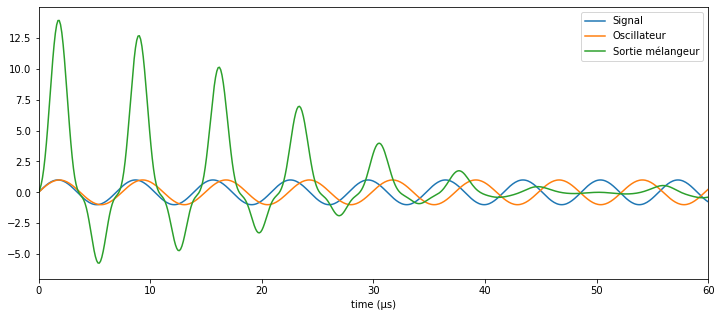

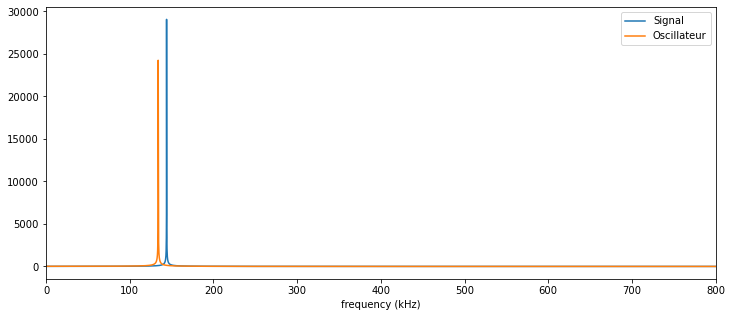

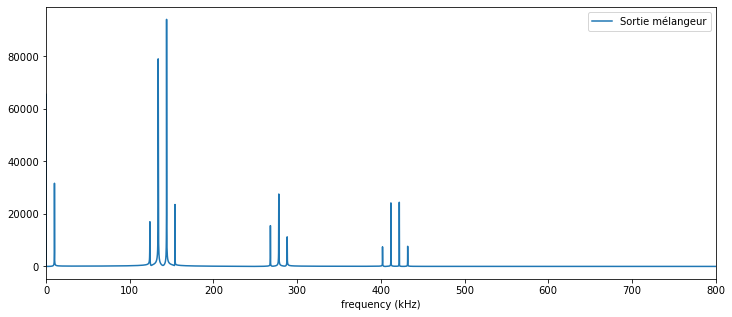

In [37]:
# frequence du signal
fs = 144e3
ws = 2*np.pi*fs
# frequence de l'oscillateur
fo = 134e3
wo = 2*np.pi*fo

npts = 2**16 # nombre de points simulés
f = fs*60 # echantillonnage "analogique" on veut f >> fs et fo
t = np.arange(npts)/f
s = np.sin(ws*t)
o = np.sin(wo*t)
m = (o+s)+(o+s)**2+(o+s)**3 # signal mélangé

# Affichage du signal et de l'oscillateur
fig1=plt.figure(1,(12,5))
ax1=fig1.add_subplot(1,1,1)
ax1.plot(t*1e6,s,label='Signal')
ax1.plot(t*1e6,o,label='Oscillateur')
ax1.plot(t*1e6,m,label='Sortie mélangeur')
ax1.legend(loc='best')
ax1.set_xlim(0,60)
ax1.set_xlabel('time (µs)')


freq = np.arange(int(npts/2))*f/npts
s_spec = np.abs(np.fft.fft(s))[:int(npts/2)]
o_spec = np.abs(np.fft.fft(o))[:int(npts/2)]
m_spec = np.abs(np.fft.fft(m))[:int(npts/2)]

# Affichage de leur spectre
fig2=plt.figure(2,(12,5))
ax2=fig2.add_subplot(1,1,1)
ax2.plot(freq/1e3, s_spec, label='Signal')
ax2.plot(freq/1e3, o_spec, label='Oscillateur')
ax2.legend(loc='best')
ax2.set_xlabel('frequency (kHz)')
ax2.set_xlim(0, 800)

# Affichage de leur spectre
freq = np.arange(int(npts/2))*f/npts
fig3=plt.figure(3,(12,5))
ax3=fig3.add_subplot(1,1,1)
ax3.plot(freq/1e3, m_spec, label='Sortie mélangeur')
ax3.legend(loc='best')
ax3.set_xlabel('frequency (kHz)')
ax3.set_xlim(0, 800)